# 🔪Crime Analysis in the City of Los Angeles🌴

Author:Dan Xu

Course Project, UC Irvine, Math 10, Summer 2023

## Questions to help Yasmeen and Anthony

(We will remove this section if you want your project posted on the course notes.)

The course [project's instructions](https://ybaki97.github.io/Math10-SSII23/final/final.html) are posted in the course notes.

* What is your Student ID number?

81135800



* What is the "extra component" (or multiple extra components) that you're including in this project that weren't covered in Math 10?



Decsision Tree and K-Nearest Neighbors.


* Would you like your project posted in the course notes?  (Posting your project is optional. This might make the project easier to share if you are applying for an internship, for example.  Feel free to include additional pieces above if you want, such as your email address or a link to your homepage or GitHub repository, if you have one.)

Yes!

* If a lot of your knowledge of Python comes from somewhere outside of Math 10 (e.g., you took another Python class before), tell me a little about that.  (This way, if your project looks significantly different from what we learned in Math 10, this explanation will help me understand why.)

## 👉Introduction


In light of the recent surge in crime rates, there is a growing concern about the safety of our society. To address this issue, I am embarking on a research project that leverages a dataset sourced from the Los Angeles Police Department (LAPD), encompassing crime data spanning from the year 2020 to the present day. This dataset provides a valuable resource for me to investigate whether Female Victims are more than Male,also to predict the total number of Victims per Month. Additionally, I try to use the Linear Classification to determine the gender of the Victim, and use K-Means to see how cluster partition our data. My goal is to explore these assumption comprehensively, shedding light on any potential correlations and contributing to our understanding of the dynamics behind the criminal activity.

## 📚Definition and Description 
Below, you'll find explanations for each column in the dataset, outlining their respective meanings.
* DR_NO: Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits.
* Date Rptd: The reported date.
* DATE OCC: The crime occurrence date.
* TIME OCC: The occurrence time.
* AREA: The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.
* AREA NAME: The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.
* Rpt Dist No: A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at http://geohub.lacity.org/datasets/c4f83909b81d4786aa8ba8a74.
* Part 1-2: Number of parties.
* Crm Cd: Indicates the crime committed. (Same as Crime Code 1).
* Crm Cd Desc: Defines the Crime Code provided.
* Mocodes: Modus Operandi: Activities associated with the suspect in commission of the crime.See attached PDF for list of MO Codes in numerical order. https://data.lacity.org/api/views/y8tr-7khq/files/3a967fbd-f210-4857-bc52-60230efe256c?download=true&filename=MO%20CODES%20(numerical%20order.
* Vict Age: The victim age.
* Vict Sex: Gender,F - Female M - Male X - Unknown.
* Vict Descent: Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian.
* Premis Cd: The type of structure, vehicle, or location where the crime took place.
* Premis Desc: Defines the Premise Code provided.
* Weapon Used Cd: The type of weapon used in the crime.
* Weapon Desc: Defines the Weapon Used Code provided.
* Status: Status of the case. (IC is the default).
* Status Desc: Defines the Status Code provided.
* Crm Cd 1: Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.
* Crm Cd 2: May contain a code for an additional crime, less serious than Crime Code 1.
* Crm Cd 3: May contain a code for an additional crime, less serious than Crime Code 1.
* Crm Cd 4: May contain a code for an additional crime, less serious than Crime Code 1.
* LOCATION: Street address of crime incident rounded to the nearest hundred block to maintain anonymity.
* Cross Street: Cross Street of rounded Address.
* LAT: Latitude.
* LON: Longtitude.

## 🤔Assumption 
Before we begin exploring our data, let's establish an initial assumption. Afterward, we'll verify the accuracy of our assumption through data exploration.
__Assumption:__ Female victims may be more than male victims.

## 💻Explore the Date

We'll import the dataset, and look a few rows to get some idea what information we have.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("Crime_Data.csv")
# Let's get some insight about our data
df.head()

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  201220752  09/16/2020 12:00:00 AM  09/16/2020 12:00:00 AM      1230    12   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2  77th Street         1259         2     745   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  Status Desc  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO  Adult Other   
1                           BATTERY - SIMPLE ASSAULT  ...     IC  Invest Cont   
2           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC  Invest Cont   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC  Invest Cont   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC  Invest Cont   

  Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0    624.0      NaN       NaN      NaN   
1    624.0      NaN       NaN      NaN   
2    745.0      NaN       NaN      NaN   
3    745.0    998.0       NaN      NaN   
4    740.0      NaN       NaN      NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1100 W  39TH                         PL          NaN  34.0141 -118.2978  
1    700 S  HILL                         ST          NaN  34.0459 -118.2545  
2    700 E  73RD                         ST          NaN  33.9739 -118.2630  
3   5400    CORTEEN                      PL          NaN  34.1685 -118.4019  
4  14400    TITUS                        ST          NaN  34.2198 -118.4468  

[5 rows x 28 columns]

What I'll do next is to convert `TIME OCC` into a real 24 hour time format instead of integers. The resources I used will be attached to the end of the project.

In [ ]:
df["TIME OCC"] = df["TIME OCC"].apply(lambda time: str(time).zfill(4)[:2] + ':' + str(time).zfill(4)[2:])
df

DR_NO               Date Rptd                DATE OCC TIME OCC  \
0        10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM    22:30   
1       190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM    03:30   
2       201220752  09/16/2020 12:00:00 AM  09/16/2020 12:00:00 AM    12:30   
3       191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM    17:30   
4       191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM    04:15   
...           ...                     ...                     ...      ...   
317849  211208872  03/19/2021 12:00:00 AM  03/19/2021 12:00:00 AM    11:05   
317850  210506531  03/04/2021 12:00:00 AM  03/04/2021 12:00:00 AM    22:10   
317851  211710505  07/09/2021 12:00:00 AM  07/09/2021 12:00:00 AM    10:50   
317852  210312887  07/12/2021 12:00:00 AM  07/12/2021 12:00:00 AM    12:00   
317853  212005847  02/22/2021 12:00:00 AM  02/22/2021 12:00:00 AM    12:00   

        AREA    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0          3    Southwest          377         2     624   
1          1      Central          163         2     624   
2         12  77th Street         1259         2     745   
3         15  N Hollywood         1543         2     745   
4         19      Mission         1998         2     740   
...      ...          ...          ...       ...     ...   
317849    12  77th Street         1218         1     510   
317850     5       Harbor          564         2     434   
317851    17   Devonshire         1798         2     624   
317852     3    Southwest          363         1     350   
317853    20      Olympic         2034         1     510   

                                              Crm Cd Desc  ... Status  \
0                                BATTERY - SIMPLE ASSAULT  ...     AO   
1                                BATTERY - SIMPLE ASSAULT  ...     IC   
2                VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   
3                VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   
4       VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   
...                                                   ...  ...    ...   
317849                                   VEHICLE - STOLEN  ...     IC   
317850                                 FALSE IMPRISONMENT  ...     AA   
317851                           BATTERY - SIMPLE ASSAULT  ...     IC   
317852                                      THEFT, PERSON  ...     IC   
317853                                   VEHICLE - STOLEN  ...     IC   

         Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0        Adult Other    624.0      NaN       NaN      NaN   
1        Invest Cont    624.0      NaN       NaN      NaN   
2        Invest Cont    745.0      NaN       NaN      NaN   
3        Invest Cont    745.0    998.0       NaN      NaN   
4        Invest Cont    740.0      NaN       NaN      NaN   
...              ...      ...      ...       ...      ...   
317849   Invest Cont    510.0      NaN       NaN      NaN   
317850  Adult Arrest    434.0      NaN       NaN      NaN   
317851   Invest Cont    624.0      NaN       NaN      NaN   
317852   Invest Cont    350.0      NaN       NaN      NaN   
317853   Invest Cont    510.0      NaN       NaN      NaN   

                                        LOCATION  \
0        1100 W  39TH                         PL   
1         700 S  HILL                         ST   
2         700 E  73RD                         ST   
3        5400    CORTEEN                      PL   
4       14400    TITUS                        ST   
...                                          ...   
317849           58TH                         ST   
317850    200 W  2ND                          ST   
317851   8800    DEMPSEY                      AV   
317852           CRENSHAW                     BL   
317853   3300 W  8TH                          ST   

                           Cross Street      LAT       LON  
0                                   NaN  34.0141 -118.2978

Then we'll create new columns, which contain the month and hour. Before we create the columns, we need to convert those `DATE OCC` and `TIME OCC` into datetime type, then we can use `.dt` accessor to get the value of month and hour.

In [ ]:
# convert date occ to datetime, add month columns.
df["DATE OCC"] = pd.to_datetime(df["DATE OCC"])
df["Month"] = df["DATE OCC"].dt.month
df["TIME OCC"] = pd.to_datetime(df["TIME OCC"])
df["Hour"] = df["TIME OCC"].dt.hour
df

DR_NO               Date Rptd   DATE OCC            TIME OCC  \
0        10304468  01/08/2020 12:00:00 AM 2020-01-08 2023-09-19 22:30:00   
1       190101086  01/02/2020 12:00:00 AM 2020-01-01 2023-09-19 03:30:00   
2       201220752  09/16/2020 12:00:00 AM 2020-09-16 2023-09-19 12:30:00   
3       191501505  01/01/2020 12:00:00 AM 2020-01-01 2023-09-19 17:30:00   
4       191921269  01/01/2020 12:00:00 AM 2020-01-01 2023-09-19 04:15:00   
...           ...                     ...        ...                 ...   
317849  211208872  03/19/2021 12:00:00 AM 2021-03-19 2023-09-19 11:05:00   
317850  210506531  03/04/2021 12:00:00 AM 2021-03-04 2023-09-19 22:10:00   
317851  211710505  07/09/2021 12:00:00 AM 2021-07-09 2023-09-19 10:50:00   
317852  210312887  07/12/2021 12:00:00 AM 2021-07-12 2023-09-19 12:00:00   
317853  212005847  02/22/2021 12:00:00 AM 2021-02-22 2023-09-19 12:00:00   

        AREA    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0          3    Southwest          377         2     624   
1          1      Central          163         2     624   
2         12  77th Street         1259         2     745   
3         15  N Hollywood         1543         2     745   
4         19      Mission         1998         2     740   
...      ...          ...          ...       ...     ...   
317849    12  77th Street         1218         1     510   
317850     5       Harbor          564         2     434   
317851    17   Devonshire         1798         2     624   
317852     3    Southwest          363         1     350   
317853    20      Olympic         2034         1     510   

                                              Crm Cd Desc  ... Crm Cd 1  \
0                                BATTERY - SIMPLE ASSAULT  ...    624.0   
1                                BATTERY - SIMPLE ASSAULT  ...    624.0   
2                VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...    745.0   
3                VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...    745.0   
4       VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...    740.0   
...                                                   ...  ...      ...   
317849                                   VEHICLE - STOLEN  ...    510.0   
317850                                 FALSE IMPRISONMENT  ...    434.0   
317851                           BATTERY - SIMPLE ASSAULT  ...    624.0   
317852                                      THEFT, PERSON  ...    350.0   
317853                                   VEHICLE - STOLEN  ...    510.0   

        Crm Cd 2 Crm Cd 3 Crm Cd 4                                  LOCATION  \
0            NaN      NaN      NaN   1100 W  39TH                         PL   
1            NaN      NaN      NaN    700 S  HILL                         ST   
2            NaN      NaN      NaN    700 E  73RD                         ST   
3          998.0      NaN      NaN   5400    CORTEEN                      PL   
4            NaN      NaN      NaN  14400    TITUS                        ST   
...          ...      ...      ...                                       ...   
317849       NaN      NaN      NaN           58TH                         ST   
317850       NaN      NaN      NaN    200 W  2ND                          ST   
317851       NaN      NaN      NaN   8800    DEMPSEY                      AV   
317852       NaN      NaN      NaN           CRENSHAW                     BL   
317853       NaN      NaN      NaN   3300 W  8TH                          ST   

                           Cross Street      LAT       LON Month Hour  
0                                   NaN  34.0141 -118.2978     1   22  
1                                   NaN  34.0459 -118.2545     1    3  
2                                   NaN  33.9739 -118.2630     9   12  
3                                   NaN  34.1685 -118.4019     1   17  
4                                   NaN  34.2198 -118.4468     1    4  
...                                 ...      ...       ...   ...  ...  
317849  FIGU

We can see in the `Vict Age` column has 0 age, it's not useful for us to analyze, then we'll drop these rows.

In [ ]:
df = df[~df.isin([0]).any(axis=1)]
df

DR_NO               Date Rptd   DATE OCC            TIME OCC  \
0        10304468  01/08/2020 12:00:00 AM 2020-01-08 2023-09-19 22:30:00   
1       190101086  01/02/2020 12:00:00 AM 2020-01-01 2023-09-19 03:30:00   
2       201220752  09/16/2020 12:00:00 AM 2020-09-16 2023-09-19 12:30:00   
3       191501505  01/01/2020 12:00:00 AM 2020-01-01 2023-09-19 17:30:00   
4       191921269  01/01/2020 12:00:00 AM 2020-01-01 2023-09-19 04:15:00   
...           ...                     ...        ...                 ...   
317847  212000771  05/28/2021 12:00:00 AM 2021-05-28 2023-09-19 19:30:00   
317848  212110947  07/04/2021 12:00:00 AM 2021-07-04 2023-09-19 21:35:00   
317850  210506531  03/04/2021 12:00:00 AM 2021-03-04 2023-09-19 22:10:00   
317851  211710505  07/09/2021 12:00:00 AM 2021-07-09 2023-09-19 10:50:00   
317852  210312887  07/12/2021 12:00:00 AM 2021-07-12 2023-09-19 12:00:00   

        AREA    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0          3    Southwest          377         2     624   
1          1      Central          163         2     624   
2         12  77th Street         1259         2     745   
3         15  N Hollywood         1543         2     745   
4         19      Mission         1998         2     740   
...      ...          ...          ...       ...     ...   
317847    20      Olympic         2056         2     888   
317848    21      Topanga         2143         2     624   
317850     5       Harbor          564         2     434   
317851    17   Devonshire         1798         2     624   
317852     3    Southwest          363         1     350   

                                              Crm Cd Desc  ... Crm Cd 1  \
0                                BATTERY - SIMPLE ASSAULT  ...    624.0   
1                                BATTERY - SIMPLE ASSAULT  ...    624.0   
2                VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...    745.0   
3                VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...    745.0   
4       VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...    740.0   
...                                                   ...  ...      ...   
317847                                        TRESPASSING  ...    888.0   
317848                           BATTERY - SIMPLE ASSAULT  ...    624.0   
317850                                 FALSE IMPRISONMENT  ...    434.0   
317851                           BATTERY - SIMPLE ASSAULT  ...    624.0   
317852                                      THEFT, PERSON  ...    350.0   

        Crm Cd 2 Crm Cd 3 Crm Cd 4                                  LOCATION  \
0            NaN      NaN      NaN   1100 W  39TH                         PL   
1            NaN      NaN      NaN    700 S  HILL                         ST   
2            NaN      NaN      NaN    700 E  73RD                         ST   
3          998.0      NaN      NaN   5400    CORTEEN                      PL   
4            NaN      NaN      NaN  14400    TITUS                        ST   
...          ...      ...      ...                                       ...   
317847     998.0      NaN      NaN    900 S  BERENDO                      ST   
317848       NaN      NaN      NaN  23100    FRIAR                        ST   
317850       NaN      NaN      NaN    200 W  2ND                          ST   
317851       NaN      NaN      NaN   8800    DEMPSEY                      AV   
317852       NaN      NaN      NaN           CRENSHAW                     BL   

                           Cross Street      LAT       LON Month Hour  
0                                   NaN  34.0141 -118.2978     1   22  
1                                   NaN  34.0459 -118.2545     1    3  
2                                   NaN  33.9739 -118.2630     9   12  
3                                   NaN  34.1685 -118.4019     1   17  
4                                   NaN  34.2198 -118.4468     1    4  
...                                 ...      ...       ...   ...  ...  
317847      

I'll select many different columns to create a new datafram, and drop any missing value.

In [ ]:
df_sub = df[["DATE OCC","Vict Sex","AREA NAME","Vict Age","Vict Descent","Hour","Month"]].dropna().copy()
df_sub

DATE OCC Vict Sex    AREA NAME  Vict Age Vict Descent  Hour  Month
0      2020-01-08        F    Southwest        36            B    22      1
1      2020-01-01        M      Central        25            H     3      1
2      2020-09-16        M  77th Street        62            B    12      9
3      2020-01-01        F  N Hollywood        76            W    17      1
4      2020-01-01        X      Mission        31            X     4      1
...           ...      ...          ...       ...          ...   ...    ...
317847 2021-05-28        M      Olympic        29            H    19      5
317848 2021-07-04        M      Topanga        44            W    21      7
317850 2021-03-04        F       Harbor        41            B    22      3
317851 2021-07-09        M   Devonshire        40            H    10      7
317852 2021-07-12        F    Southwest        15            H    12      7

[229370 rows x 7 columns]

## 📈 Plotting Chart

Then we'll plot many differnt charts. Before we do that, we need to import `Altair` first.

In [ ]:
import altair as alt

Since we have a large dataset, whchi will exceed the number of altair can accept, then we need to random select our data, and to make sure the random reault will not change everytime.

In [ ]:
df_pre = df_sub.sample(5000,random_state=50)

We'll see the total number of Victims per month in the below chart.

In [ ]:
total_victim_chart = alt.Chart(df_pre).mark_bar(size = 20).encode(
   x = alt.X("Month"),
   y = alt.Y("count(Vict Sex)"),
   color = alt.Color('Month', scale=alt.Scale(scheme='redpurple')),
   tooltip = ["count(Vict Age)"]
).properties(title = "Total Victims Per Month")
total_victim_chart


alt.Chart(...)

From above, we could see the number of Victims in January to July is greater than August to September.

We'll keep exploring data to see the number of Female and Male in each month. To compare female and male, we need to sperate our data into two sub dataframe, one is the dataframe containing only Female Victims, anothe is containing Male Victims, then to plot a chart. 

In [ ]:
df_sub1 = df_pre[df_pre["Vict Sex"].str.contains("F")]
df_sub1

DATE OCC Vict Sex    AREA NAME  Vict Age Vict Descent  Hour  Month
265084 2021-03-09        F      West LA        19            A    19      3
128226 2020-08-09        F      Pacific        31            W    19      8
88874  2020-08-21        F      Mission        57            O    11      8
189547 2020-12-19        F    Southwest        28            B     8     12
143058 2020-06-15        F     Van Nuys         5            B    12      6
...           ...      ...          ...       ...          ...   ...    ...
231567 2021-01-19        F      West LA        29            W    20      1
251113 2021-02-10        F     Van Nuys        31            H     8      2
271580 2021-01-07        F  77th Street        34            H     8      1
266620 2021-07-24        F  N Hollywood        36            W     6      7
195530 2020-06-22        F  West Valley        16            H    17      6

[2395 rows x 7 columns]

In [ ]:
df_sub2 = df_pre[df_pre["Vict Sex"].str.contains("M")]
df_sub2

DATE OCC Vict Sex    AREA NAME  Vict Age Vict Descent  Hour  Month
297056 2021-02-14        M      Olympic        54            H    12      2
314052 2021-02-02        M   Devonshire        43            B    11      2
135737 2020-08-30        M      Rampart        26            W    17      8
231820 2021-04-12        M   Devonshire        32            B    16      4
171612 2020-12-07        M      Olympic        25            H     8     12
...           ...      ...          ...       ...          ...   ...    ...
258142 2021-04-27        M    Southeast        39            B    15      4
28544  2020-05-12        M  77th Street        56            H    23      5
63843  2020-09-22        M  West Valley        33            O     9      9
79708  2020-04-29        M     Wilshire        30            C    12      4
189307 2020-12-26        M  West Valley        53            A    21     12

[2559 rows x 7 columns]

In [ ]:
female_victim = alt.Chart(df_sub1).mark_bar(size = 20).encode(
    x= "Month",
    y= "count(Vict Sex)",
    color = alt.Color('Month', scale=alt.Scale(scheme='blues')),
    tooltip = ["count(Vict Sex)"]

).properties(title = "Total Female Victims Per Month")


male_victim = alt.Chart(df_sub2).mark_line(color="red").encode(
    x= "Month",
    y= "count(Vict Sex)",
    tooltip = ["count(Vict Sex)"]
).properties(title = "Total Male Victims Per Month")


female_victim | male_victim

alt.HConcatChart(...)

In [ ]:
(female_victim + male_victim).properties(title = "Female Victims Versus Male Victims")

alt.LayerChart(...)

From the graph above, we can check our assumption is False. The computer generated the random data for us, and the result shows the male victims is greater than the female victims.

We can also look at the Victims' Descent. 

In [ ]:
descent_victim = alt.Chart(df_sub1).mark_bar(size = 20).encode(
    x= "Vict Descent",
    y= "count(Vict Descent)",
    color = "count(Vict Descent)",
    tooltip = ["count(Vict Descent)"]

).properties(title = "Total Number of Different Descent Victims")
descent_victim

alt.Chart(...)

We can see that Hispanic/Latin/Mexican Victims is greater than the other descent.

Let us see the median age of Victims in different Area.

In [ ]:
df_area = df_pre.groupby("AREA NAME")

In [ ]:
def make_chart(df_pre):
    chart = alt.Chart(df_pre).mark_line().encode(
        x="Month:N",
        y="median(Vict Age)",
        tooltip=["Month","median(Vict Age)"]
    )
    return chart+chart.mark_circle()

In [ ]:
make_chart(df_area.get_group("Central"))

alt.LayerChart(...)

In [ ]:
chart_list0 = [make_chart(sub_df) for ind_name,sub_df in df_area]

In [ ]:
chart_list = [make_chart(sub_df).properties(title=f"Area Name: {ind_name}") for ind_name,sub_df in df_area]

In [ ]:
alt.vconcat(*chart_list)

alt.VConcatChart(...)

## 🗂Train our Dataset

What I'll do next is trying to train our data, and using decision tree and k-nearest neighbors to see which one has the most accurate prediction rate. What we'll predict is based on the Age, hour,month and year to predictc the Vict sex.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression

First, we'll add a new column named Year to our dataframe.

In [ ]:
df_pre["Year"] = df_sub["DATE OCC"].dt.year
df_pre

DATE OCC Vict Sex    AREA NAME  Vict Age Vict Descent  Hour  Month  \
297056 2021-02-14        M      Olympic        54            H    12      2   
314052 2021-02-02        M   Devonshire        43            B    11      2   
265084 2021-03-09        F      West LA        19            A    19      3   
128226 2020-08-09        F      Pacific        31            W    19      8   
88874  2020-08-21        F      Mission        57            O    11      8   
...           ...      ...          ...       ...          ...   ...    ...   
271580 2021-01-07        F  77th Street        34            H     8      1   
79708  2020-04-29        M     Wilshire        30            C    12      4   
266620 2021-07-24        F  N Hollywood        36            W     6      7   
189307 2020-12-26        M  West Valley        53            A    21     12   
195530 2020-06-22        F  West Valley        16            H    17      6   

        Year  
297056  2021  
314052  2021  
265084  2021  
128226  2020  
88874   2020  
...      ...  
271580  2021  
79708   2020  
266620  2021  
189307  2020  
195530  2020  

[5000 rows x 8 columns]

Then we'll drop the `X` in the Vict Sex column

In [ ]:
df_pre = df_pre[df_pre["Vict Sex"].str.contains("M") | df_pre["Vict Sex"].str.contains("F")]
df_pre

DATE OCC Vict Sex    AREA NAME  Vict Age Vict Descent  Hour  Month  \
297056 2021-02-14        M      Olympic        54            H    12      2   
314052 2021-02-02        M   Devonshire        43            B    11      2   
265084 2021-03-09        F      West LA        19            A    19      3   
128226 2020-08-09        F      Pacific        31            W    19      8   
88874  2020-08-21        F      Mission        57            O    11      8   
...           ...      ...          ...       ...          ...   ...    ...   
271580 2021-01-07        F  77th Street        34            H     8      1   
79708  2020-04-29        M     Wilshire        30            C    12      4   
266620 2021-07-24        F  N Hollywood        36            W     6      7   
189307 2020-12-26        M  West Valley        53            A    21     12   
195530 2020-06-22        F  West Valley        16            H    17      6   

        Year  
297056  2021  
314052  2021  
265084  2021  
128226  2020  
88874   2020  
...      ...  
271580  2021  
79708   2020  
266620  2021  
189307  2020  
195530  2020  

[4954 rows x 8 columns]

In [ ]:
crime = ["Vict Age","Hour","Month","Year"]

What we do here is split our data into train and test set, and using the Vict age, Hour, Month and Year to predict the Vict Sex.

In [ ]:
X = df_pre[crime]
y = df_pre['Vict Sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

Here we use the decision tree, and plot the graph below.

In [ ]:
# See what contains in the DecisionTreeClassifier
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

In [ ]:
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X_train, y_train)

tree_predictions = tree.predict(X_test)

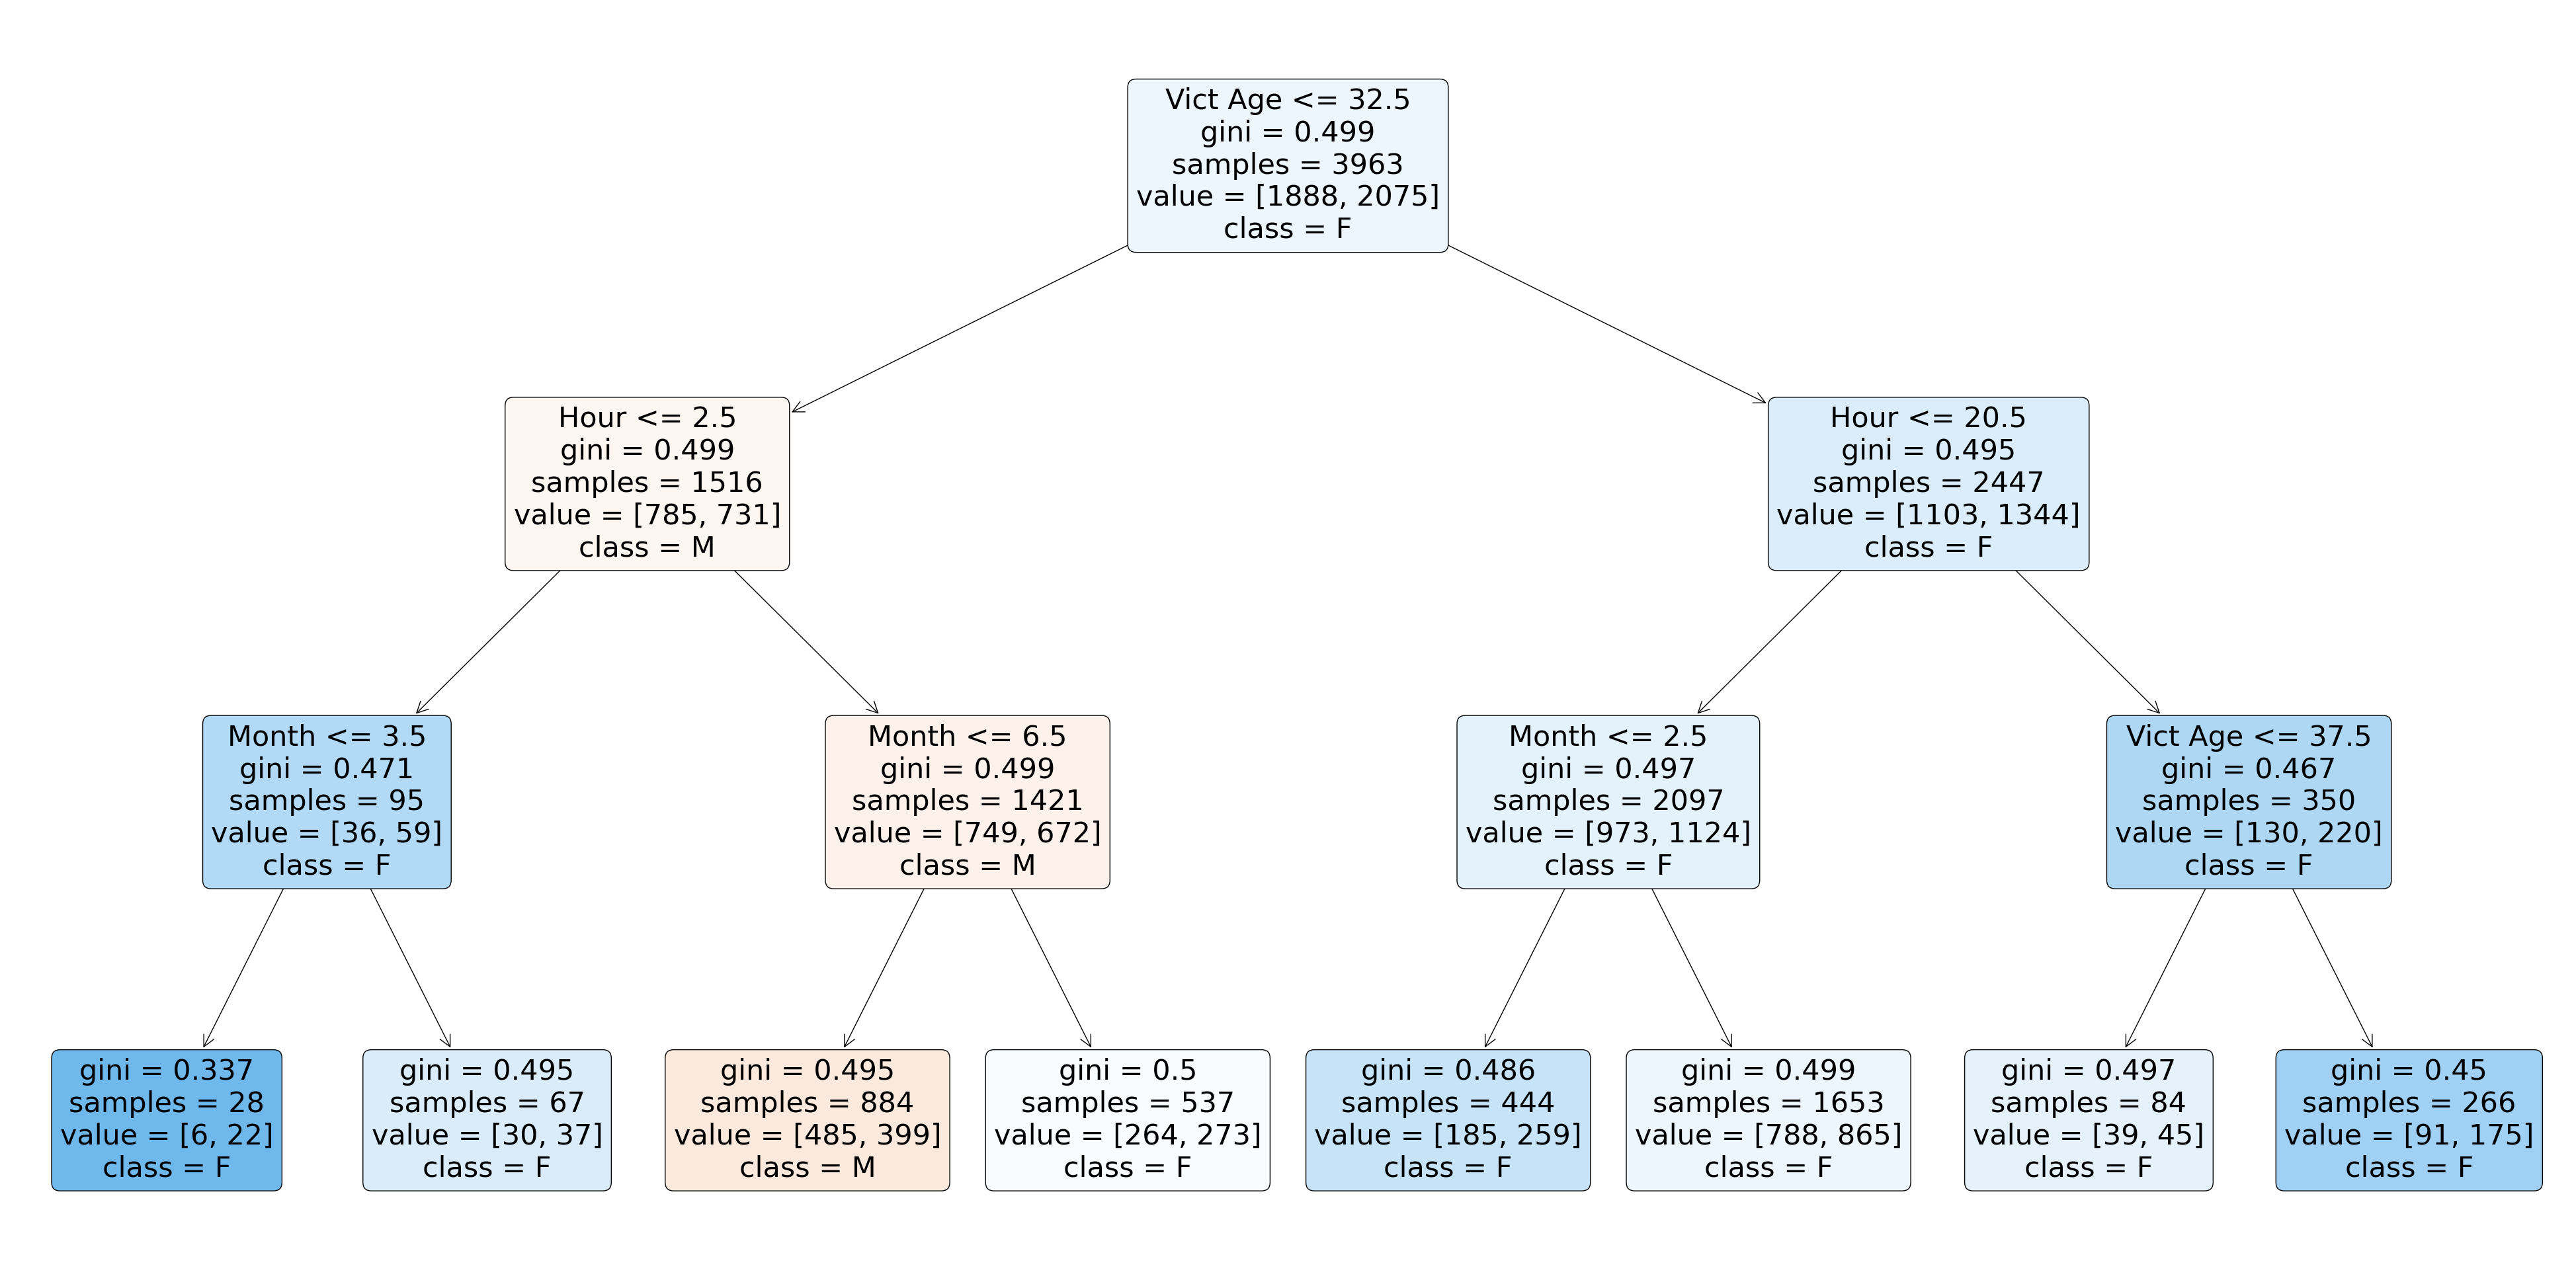

In [ ]:
sex = df_pre['Vict Sex'].unique()
plt.figure(figsize=(50,25)) 
plot_tree(tree, filled=True, rounded=True, class_names=sex, feature_names=X.columns)
plt.show()

Then we get the report to see our accuracy.

In [ ]:
print(classification_report(y_test, tree_predictions))

              precision    recall  f1-score   support

           F       0.56      0.25      0.35       507
           M       0.50      0.79      0.61       484

    accuracy                           0.52       991
   macro avg       0.53      0.52      0.48       991
weighted avg       0.53      0.52      0.48       991



It seems like the accuracy of predicitng Female Victim is a little bit higher than predicting Male Victim. But the number 56% is not good enough for the precision.
Let us see the k nearest neighbors!

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of

In [ ]:
knn = KNeighborsClassifier(n_neighbors=300)
knn.fit(X_train, y_train)

knn_predictions = knn.predict(X_test)
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           F       0.54      0.35      0.42       507
           M       0.50      0.68      0.58       484

    accuracy                           0.51       991
   macro avg       0.52      0.52      0.50       991
weighted avg       0.52      0.51      0.50       991



From above two report we can see there is no differences between K-Nearest Neighbors and Decision Tree for predicting the Male Victims since they have the same precision, which is 50%. However, for predicting Female Victims, Decision Tree is a litte be higher. Both around 50%, it's not a good number, maybe we need to contain more information or increase our size of training data.

## 📉Linear Regression

For here, we'll create a new datafram, which contians the total number victims per month, and the month column. Then we'll drop the missing value.

In [ ]:
new_data_frame = df_pre[["Month","Vict Age"]]
new_data_frame = new_data_frame.groupby("Month").count()
another_datafram = pd.DataFrame([0,1,2,3,4,5,6,7,8,9,10,11,12])
result = pd.concat([new_data_frame, another_datafram], axis=1, ignore_index=True)
result = result.rename(columns={0: "Total Victims", 1: "Month"})
result

Total Victims  Month
0             NaN      0
1           537.0      1
2           534.0      2
3           549.0      3
4           430.0      4
5           529.0      5
6           515.0      6
7           505.0      7
8           355.0      8
9           253.0      9
10          228.0     10
11          266.0     11
12          253.0     12

In [ ]:
predict_datafram = result.dropna().copy()
predict_datafram

Total Victims  Month
1           537.0      1
2           534.0      2
3           549.0      3
4           430.0      4
5           529.0      5
6           515.0      6
7           505.0      7
8           355.0      8
9           253.0      9
10          228.0     10
11          266.0     11
12          253.0     12

In [ ]:
# Instantiate Linear Regression
reg = LinearRegression()

Then we'll fit our data, to predict the total number victims per month.

In [ ]:
reg.fit(predict_datafram[["Month"]],predict_datafram["Total Victims"])

LinearRegression()

Let's see the coefficient and the intercept.

In [ ]:
reg.coef_[0]

-32.16783216783216

In [ ]:
reg.intercept_

621.9242424242424

Then we'll add a column named `pred` into our datafram, which contians the predit value.

In [ ]:
predict_datafram["pred"] = reg.predict(predict_datafram[["Month"]])
predict_datafram

Total Victims  Month        pred
1           537.0      1  589.756410
2           534.0      2  557.588578
3           549.0      3  525.420746
4           430.0      4  493.252914
5           529.0      5  461.085082
6           515.0      6  428.917249
7           505.0      7  396.749417
8           355.0      8  364.581585
9           253.0      9  332.413753
10          228.0     10  300.245921
11          266.0     11  268.078089
12          253.0     12  235.910256

Plot the prediction graph.

In [ ]:
prediction = alt.Chart(predict_datafram).mark_line(color="magenta").encode(
    x = "Month",
    y = "pred",
    tooltip = ["pred","Month"]
).properties(title = "Predict Victims Per Month")
prediction

alt.Chart(...)

Layer the prediction and the actual chart together to see if it's a good fit. Before we do that, let's see what will look like for our actual data

In [ ]:
actual = alt.Chart(predict_datafram).mark_bar(size=20).encode(
    x="Month",
    y="Total Victims",
    tooltip = ["Total Victims","Month"]
).properties(title = "Actual Victims Per Month")
actual

alt.Chart(...)

In [ ]:
(actual + prediction).properties(title = "Predict and Actual Victims Per Month")

alt.LayerChart(...)

From the above chart, it seems a good fit for me, since the actual value is decreasing, and the line is decreasing too.

## 📎 K-Means Clustering

Let us recape what information we have in the df_pre dataset.

In [ ]:
df_pre.sample(5)

DATE OCC Vict Sex   AREA NAME  Vict Age Vict Descent  Hour  Month  \
75015  2020-04-30        F    Wilshire        24            H    19      4   
115652 2020-06-30        M  Devonshire        83            W    17      6   
64935  2020-04-20        M     Topanga        38            W    13      4   
284954 2021-01-01        M     Rampart        17            H    12      1   
206203 2021-02-09        M     Central        33            B    18      2   

        Year  
75015   2020  
115652  2020  
64935   2020  
284954  2021  
206203  2021

In [ ]:
k_sub = df_pre.copy()

Then we'll import StandardScaler and instantiate it.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

Import the is_numeric_dtype to get the column which has the numercial value.

In [ ]:
from pandas.api.types import is_numeric_dtype

In [ ]:
cluster_column = [c for c in k_sub.columns if is_numeric_dtype(k_sub[c])]
cluster_column

['Vict Age', 'Hour', 'Month', 'Year']

Fit the cluster_column.

In [ ]:
scaler.fit(k_sub[cluster_column])

StandardScaler()

In [ ]:
k_sub[cluster_column] = scaler.transform(k_sub[cluster_column])
k_sub

DATE OCC Vict Sex    AREA NAME  Vict Age Vict Descent      Hour  \
297056 2021-02-14        M      Olympic  0.918022            H -0.314625   
314052 2021-02-02        M   Devonshire  0.205239            B -0.482024   
265084 2021-03-09        F      West LA -1.349925            A  0.857168   
128226 2020-08-09        F      Pacific -0.572343            W  0.857168   
88874  2020-08-21        F      Mission  1.112418            O -0.482024   
...           ...      ...          ...       ...          ...       ...   
271580 2021-01-07        F  77th Street -0.377948            H -0.984221   
79708  2020-04-29        M     Wilshire -0.637142            C -0.314625   
266620 2021-07-24        F  N Hollywood -0.248351            W -1.319019   
189307 2020-12-26        M  West Valley  0.853224            A  1.191966   
195530 2020-06-22        F  West Valley -1.544321            H  0.522370   

           Month      Year  
297056 -1.103873  1.272705  
314052 -1.103873  1.272705  
265084 -0.794791  1.272705  
128226  0.750618 -0.785728  
88874   0.750618 -0.785728  
...          ...       ...  
271580 -1.412954  1.272705  
79708  -0.485709 -0.785728  
266620  0.441537  1.272705  
189307  1.986946 -0.785728  
195530  0.132455 -0.785728  

[4954 rows x 8 columns]

Let us see the mean and standard deviations.

In [ ]:
k_sub.mean(axis=0)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


Vict Age    3.155418e-17
Hour       -9.322826e-17
Month       1.204796e-16
Year        1.040750e-14
dtype: float64

In [ ]:
k_sub.std(axis=0)

DATE OCC    174 days 03:08:29.086223064
Vict Age                       1.000101
Hour                           1.000101
Month                          1.000101
Year                           1.000101
dtype: object

From above, we could see the mean is around 0, and the std is around 1, which is good.

What we'll do next is importing the KMeans.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters = 2)

In [ ]:
kmeans.fit(k_sub[cluster_column])

KMeans(n_clusters=2)

Add a nue column to our dataframe, which is named `cluster`.

In [ ]:
k_sub["cluster"] = kmeans.predict(k_sub[cluster_column])
k_sub

DATE OCC Vict Sex    AREA NAME  Vict Age Vict Descent      Hour  \
297056 2021-02-14        M      Olympic  0.918022            H -0.314625   
314052 2021-02-02        M   Devonshire  0.205239            B -0.482024   
265084 2021-03-09        F      West LA -1.349925            A  0.857168   
128226 2020-08-09        F      Pacific -0.572343            W  0.857168   
88874  2020-08-21        F      Mission  1.112418            O -0.482024   
...           ...      ...          ...       ...          ...       ...   
271580 2021-01-07        F  77th Street -0.377948            H -0.984221   
79708  2020-04-29        M     Wilshire -0.637142            C -0.314625   
266620 2021-07-24        F  N Hollywood -0.248351            W -1.319019   
189307 2020-12-26        M  West Valley  0.853224            A  1.191966   
195530 2020-06-22        F  West Valley -1.544321            H  0.522370   

           Month      Year  cluster  
297056 -1.103873  1.272705        0  
314052 -1.103873  1.272705        0  
265084 -0.794791  1.272705        0  
128226  0.750618 -0.785728        1  
88874   0.750618 -0.785728        1  
...          ...       ...      ...  
271580 -1.412954  1.272705        0  
79708  -0.485709 -0.785728        1  
266620  0.441537  1.272705        0  
189307  1.986946 -0.785728        1  
195530  0.132455 -0.785728        1  

[4954 rows x 9 columns]

We'll let x-axis be Month, and y-axis be the Vict Age, use the predict value of kmeans be the color and shape, then we plot the chart.

In [ ]:
alt.Chart(k_sub).mark_point(size = 100, filled = True).encode(
    x="Month",
    y="Vict Age",
    color="cluster:N",
    shape="cluster:N"
)

alt.Chart(...)

Make a list of charts, instead y-axis be the Vict Age, we'll let y-axis be our cluster_column.

In [ ]:
chart_list = []
for c in cluster_column:
    chart = alt.Chart(k_sub).mark_point(size=100,filled=True).encode(
        x="Month",
        y=c,
        color="cluster:N",
        shape="cluster:N"
    )
    chart_list.append(chart)

In [ ]:
alt.vconcat(*chart_list)

alt.VConcatChart(...)

## 😄 Summary

In my project, I utilize a single dataset containing crime data spanning from 2020 to the present day. My primary objectives are to leverage machine learning techniques for predicting the gender of the victims and employing a Linear Regression model to forecast the monthly total victim count. Additionally, I aim to discern whether the number of female victims exceeds that of male victims. To achieve these goals, I employ two distinct methods: K-Nearest Neighbors and Decision Trees, with the intention of determining which method yields the highest predictive accuracy. Also, I use K-Means to see how the cluster partition our data.

## 📝 References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?

https://www.kaggle.com/datasets/susant4learning/crime-in-los-angeles-data-from-2020-to-present

* List any other references that you found helpful.

1. https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8
2. https://www.w3schools.com/python/ref_string_zfill.asp
3. https://www.geeksforgeeks.org/apply-a-function-to-each-row-or-column-in-dataframe-using-pandas-apply/amp/
4. https://medium.com/analytics-vidhya/los-angeles-crime-data-analysis-using-pandas-a68780d80a83
5. https://scikit-learn.org/stable/modules/tree.html
6. https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point.
7. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

## Submission

Using the Share button at the top right, **enable Comment privileges** for anyone with a link to the project. Then submit that link on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5d7ea87b-6138-48b8-8de6-4ad12e71887e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>